In [25]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
import numpy as np
from numpy import random
import gensim
import nltk
import pandas as pd
import re



In [26]:
df=pd.read_excel('final_210429_tous labels.xlsx',engine='openpyxl')

In [27]:
df = df.drop(['Date de création',  'Date de modification','Nom du fichier'], axis=1)

In [28]:
df['Messages']=df['Messages'].astype(str)

In [29]:
print(df['Messages'].apply(lambda x: len(x.split(' '))).sum())
msg=df.head(2500)

943208


In [30]:
tab=[]

for i in msg.index:
    
    msg['Messages'][i]=re.sub('([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)', '', str(msg['Messages'][i]))#email
    #phone
    msg['Messages'][i]=re.sub(r"/\d{10}|\+33\d{9}|\+33\s\d{1}\s\d{2}\s\d{2}\s\d{2}\s\d{2}|\d{2}\s\d{2}\s\d{2}\s\d{2}\s\d{2}/g",' ',str(msg['Messages'][i]))#phone francais
    msg['Messages'][i]=re.sub(r'(^(\+33 |0)[1-6]{1}(([0-9]{2}){4})|((\s[0-9]{2}){4})|((-[0-9]{2}){4})$)','',str(msg['Messages'][i]))
    msg['Messages'][i]=re.sub("((?:\+\d{2}[-\.\s]??|\d{4}[-\.\s]??)?(?:\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4}))",'', str(msg['Messages'][i]))#phone
    msg['Messages'][i]=re.sub('\(?\d{2}\)?[-.\s]?\d{2}[-.\s]?\d{2}[-.\s]?\d{2}[-.\s]?\d{2}','',str(msg['Messages'][i]))
    msg['Messages'][i]=re.sub('\(?\d{2}\)?[-.\s]?\d{2}[-.\s]?\d{2}[-.\s]?\d{2}[-.\s]','',str(msg['Messages'][i]))
    msg['Messages'][i]=re.sub('\(?\d{1}\)?[-.\s]?\d{2}[-.\s]?\d{2}[-.\s]?\d{2}[-.\s]','',str(msg['Messages'][i]))
    msg['Messages'][i]=re.sub('\(?\d{2}\)?[-.\s]?\d{5}[-.\s]?\d{3}','',str(msg['Messages'][i]))
    msg['Messages'][i]=re.sub('\(?\d{1}\)?[-.\s]?\d{2}[-.\s]?\d{2}[-.\s]?\d{3}','',str(msg['Messages'][i]))
    msg['Messages'][i]=re.sub('\(?\d{2}\)?[-.\s]?\d{3}[-.\s]?\d{3}[-.\s]?\d{3}','',str(msg['Messages'][i]))
    #Emoji
    emoji= re.compile(u'['u'\U0001F300-\U0001F64F'u'\U0001F680-\U0001F6FF'u'\u2600-\u26FF\u2700-\u27BF]+', re.UNICODE)
    msg['Messages'][i]=re.sub(emoji,' ',str(msg['Messages'][i]))
    #text
    msg['Messages'][i]= msg['Messages'][i].replace("Avant d\'imprimer cet e-mail, réfléchissez à l\'impact sur l\'environnementBefore you print this mail, think about the impact on the environment",'')
    dele = ["Mail:","Email:","e-mail","Email : ","mail","Tél : +","Fax : +","tél.: + ()","port.: + () ","fax.: + ()"]
    #df['Text'][i]= df['Text'][i].replace(dele,'')
    msg['Messages'][i]= msg['Messages'][i].replace("Mail:",'')
    msg['Messages'][i]= msg['Messages'][i].replace("Email:",'')
    msg['Messages'][i]= msg['Messages'][i].replace("E-mail",'')
    msg['Messages'][i]= msg['Messages'][i].replace("Email : ",'')
    msg['Messages'][i]= msg['Messages'][i].replace("mail",'')
    msg['Messages'][i]=re.sub(r'\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4}','',str(msg['Messages'][i]))
    #df['Text'][i]=re.sub(r'\d+','',str(df['Text'][i]))#Tél : +      Fax : +, tél.: + ()       fax.: + ()      port.: + () 
    msg['Messages'][i]= re.sub("http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+",'',msg['Messages'][i])#url
    msg['Messages'][i]= re.sub('(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})',' ',str(msg['Messages'][i]))#url www
    msg['Messages'][i]= re.sub('Ce message et toutes les Pieces jointes (ci apres : le message) sont etablis a l\'intention exclusive de ses destinataires et sont confidentiels.Toute utilisation de ce message non conforme a sa destination, toute diffusion ou toute publication totale ou partielle est interdite sauf autorisation prealable.Si vous recevez ce message par erreur, merci de le detruire et d\' avertir immediatement l\'expediteur.Les communications sur Internet n\'etant pas securisees, le Groupe APRR decline toute responsabilite quant au contenu de ce message.This message and all attached documents (hereafter "the message") are intended for the exclusive attention of its recipients and are confidential. Any use of this message, for which it was not intended, any distribution or any total or partial publication is prohibited unless previously approved.If you receive this message in error, please destroy it and immediately notify the sender thereof.Since communication by Internet is not secure, Group APRR cannot accept any responsibility regarding the contents of this message.',' ',str(msg['Messages'][i]))
    #df['Text'][i]= re.sub('SCAN <>Cet  a été envoyé par "copieurRICOH" (MP C3004ex).Date de numérisation: 07.08.2020 17:17:25 (+0200)Contacter si besoin :  ','',str(df['Text'][i]))
    msg['Messages'][i]= re.sub('Ce message est généré automatiquement. Merci de ne pas y répondre.',' ',str(msg['Messages'][i]))
    msg['Messages'][i]= re.sub('Ce message et toutes les Pieces jointes (ci apres : le message) sont etablis a l\'intention exclusive de ses destinataires et sont confidentiels.Toute utilisation de ce message non conforme a sa destination, toute diffusion ou toute publication totale ou partielle est interdite sauf autorisation prealable.Si vous recevez ce message par erreur, merci de le detruire et d\' avertir immediatement l\'expediteur.Les communications sur Internet n\'etant pas securisees, le Groupe APRR decline toute responsabilite quant au contenu de ce message.This message and all attached documents (hereafter "the message") are intended for the exclusive attention of its recipients and are confidential. Any use of this message, for which it was not intended, any distribution or any total or partial publication is prohibited unless previously approved.If you receive this message in error, please destroy it and immediately notify the sender thereof.Since communication by Internet is not secure, Group APRR cannot accept any responsibility regarding the contents of this message.',' ',str(msg['Messages'][i]))
    msg['Messages'][i]= re.sub('This message and any attachments are confidential and intended for the named addressee(s) only.If you have received this message in error, please notify immediately the sender, then deletethe message. Any unauthorized modification, edition, use or dissemination is prohibited.The sender shall not be liable for this message if it has been modified, altered, falsified, infectedby a virus or even edited or disseminated without authorization.',' ',str(msg['Messages'][i]))
    msg['Messages'][i]= re.sub('This  transmission (message and any attached files) may contain information that is proprietary, privileged and/or confidential to Veolia Environnement and/or its affiliates and is intended exclusively for the person(s) to whom it is addressed. If you are not the intended recipient, please notify the sender by return  and delete all copies of this , including all attachments. Unless expressly authorized, any use, disclosure, publication, retransmission or dissemination of this  and/or of its attachments is strictly prohibited. Ce message electronique et ses fichiers attaches sont strictement confidentiels et peuvent contenir des elements dont Veolia Environnement et/ou l\'une de ses entites affiliees sont proprietaires. Ils sont donc destines a l\'usage de leurs seuls destinataires. Si vous avez recu ce message par erreur, merci de le retourner a son emetteur et de le detruire ainsi que toutes les pieces attachees. L\'utilisation, la divulgation, la publication, la distribution, ou la reproduction non expressement autorisees de ce message et de ses pieces attachees sont interdites.',' ',str(msg['Messages'][i]))
    msg['Messages'][i]= re.sub('This  transmission (message and any attached files) may contain information that is proprietary, privileged and/or confidential to Veolia Environnement and/or its affiliates and is intended exclusively for the person(s) to whom it is addressed. If you are not the intended recipient, please notify the sender by return  and delete all copies of this , including all attachments. Unless expressly authorized, any use, disclosure, publication, retransmission or dissemination of this  and/or of its attachments is strictly prohibited.  Ce message electronique et ses fichiers attaches sont strictement confidentiels et peuvent contenir des elements dont Veolia Environnement et/ou l\'une de ses entites affiliees sont proprietaires. Ils sont donc destines a l\'usage de leurs seuls destinataires. Si vous avez recu ce message par erreur, merci de le retourner a son emetteur et de le detruire ainsi que toutes les pieces attachees. L\'utilisation, la divulgation, la publication, la distribution, ou la reproduction non expressement autorisees de ce message et de ses pieces attachees sont interdites.',' ',str(msg['Messages'][i]))
    msg['Messages'][i]= re.sub('Le contenu de ce message est strictement réservé à l\'usage exclusif de son destinataire et contient de l\'information privilégiée et confidentielle. Toute lecture, divulgation, distribution ou copie non autorisée de cette communication est formellement interdite. Si vous avez reçu cette communication par erreur, veuillez la détruire immédiatement.','',str(msg['Messages'][i]))
    msg['Messages'][i]= re.sub('Ce message et toutes les Pieces jointes (ci apres : le message) sont etablis a l\'intention exclusive de ses destinataires et sont confidentiels.Toute utilisation de ce message non conforme a sa destination, toute diffusion ou toute publication totale ou partielle est interdite sauf autorisation prealable.Si vous recevez ce message par erreur, merci de le detruire et d\' avertir immediatement l\'expediteur.Les communications sur Internet n\'etant pas securisees, le Groupe APRR decline toute responsabilite quant au contenu de ce message.This message and all attached documents (hereafter "the message") are intended for the exclusive attention of its recipients and are confidential. Any use of this message, for which it was not intended, any distribution or any total or partial publication is prohibited unless previously approved.If you receive this message in error, please destroy it and immediately notify the sender thereof.Since communication by Internet is not secure, Group APRR cannot accept any responsibility regarding the contents of this message.',' ',str(msg['Messages'][i]))
    msg['Messages'][i]= re.sub('Ce message et les pièces jointes sont confidentiels et établis à l\'attention exclusive de ses destinataires. Toute utilisation ou diffusion, même partielle, non autorisée est interdite. Tout message électronique est susceptible d\'altération. Brink\'s décline toute responsabilité au titre de ce message s\'il a été altéré, déformé ou falsifié. Si vous n\'êtes pas le destinataire de ce message, merci de le détruire et d\'avertir l\'expéditeur. This message and any attachments are confidential and intended solely for the addressees. Any unauthorized use or disclosure, either whole or partial is prohibited. E-s are susceptible to alteration. Brink\'s shall not be liable for the message if altered, changed or falsified. If you are not the intended recipient of this message, please delete it and notify the sender.',' ',str(msg['Messages'][i]))
    msg['Messages'][i]= re.sub('Ce message et toutes les Pieces jointes (ci apres : le message) sont etablis a l\'intention exclusive de ses destinataires et sont confidentiels.Toute utilisation de ce message non conforme a sa destination, toute diffusion ou toute publication totale ou partielle est interdite sauf autorisation prealable.Si vous recevez ce message par erreur, merci de le detruire et d\' avertir immediatement l\'expediteur.Les communications sur Internet n\'etant pas securisees, le Groupe APRR decline toute responsabilite quant au contenu de ce message.','',str(msg['Messages'][i]))
  

C:\Users\bertille.lekeufack\.conda\envs\stage1\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [31]:
from langdetect import detect

In [32]:
texl70 = msg['Messages']
langdet = []
    
for i in range(len(msg)):                                         
    try:                                                          
        lang=detect(texl70[i])                                      
    except:                                                       
        lang=''                                                  
        print("This row throws error:", texl70[i])                 
    langdet.append(lang)     

This row throws error:  
This row throws error: ‌
This row throws error:    
This row throws error:    
This row throws error:    
This row throws error:    
This row throws error:    


In [33]:
msg['lang']=langdet
msg.head()

<ipython-input-33-502140c9bd2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msg['lang']=langdet


,Messages,catégorie,lang
0,"Bonjour,Ci-joint le mandat sepa et le rib.Cord...",contrat,fr
1,DANIEL GUEGANSOCIETE DES TRANSPORTS GUEGANCl...,commande de badge,fr
2,"Bonjour, J’ai essayé de faire la modification...",contrat,fr
3,"Bonjour, merci de me faire un badge avec la gé...",commande de badge,fr
4,No Message,no message,de


In [34]:
msg=msg.loc[msg['lang']=='fr']
msg.shape

(1735, 3)

In [35]:
import seaborn as sns

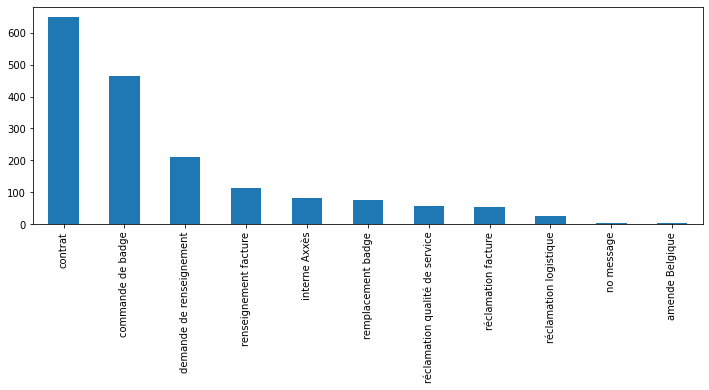

In [36]:
import matplotlib.pyplot as plt
my_tags = msg['catégorie']
plt.figure(figsize=(12,4))
my_tags.value_counts().plot(kind='bar');

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(msg['Messages'],
                               msg['catégorie'],stratify=msg['catégorie'],test_size=0.20, random_state=42
)

In [38]:
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler 
from collections import Counter
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import MaxAbsScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OutputCodeClassifier

In [39]:
from imblearn.over_sampling import SMOTE

In [45]:

k=2
seed=6
logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                #('under', RandomOverSampler()),#sampling_strategy=ss
                #('smote', SMOTE(random_state=seed,k_neighbors=k, sampling_strategy = 'minority')),
                ('clf', OneVsRestClassifier(LinearSVC(random_state=0))),
                
               ])
logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,labels=np.unique(y_pred)))

accuracy 0.590778097982709
                                precision    recall  f1-score   support

             commande de badge       0.67      0.86      0.75        93
                       contrat       0.60      0.70      0.65       130
      demande de renseignement       0.29      0.24      0.26        42
                 interne Axxès       0.77      0.59      0.67        17
            remplacement badge       0.00      0.00      0.00        15
         renseignement facture       0.65      0.48      0.55        23
           réclamation facture       0.33      0.09      0.14        11
        réclamation logistique       0.00      0.00      0.00         5
réclamation qualité de service       0.67      0.18      0.29        11

                      accuracy                           0.59       347
                     macro avg       0.44      0.35      0.37       347
                  weighted avg       0.55      0.59      0.56       347



In [42]:
X_test.shape

(347,)

In [ ]:
logreg.predict('no message')

In [46]:
set(y_test)-set(y_pred)

set()